<a href="https://colab.research.google.com/github/Poojav21/IPL_Prediction/blob/main/IPL_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches.shape

(756, 18)

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveries.shape

(179078, 21)

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
deliveries.groupby(['match_id', 'inning']).sum()['total_runs']

<ipython-input-8-67ff17ad7611>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deliveries.groupby(['match_id', 'inning']).sum()['total_runs']


match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [ ]:
total_score_df = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

<ipython-input-9-ea33c47d883d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()


In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [ ]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [ ]:
match_df = matches.merge(total_score_df[['match_id', 'total_runs']], left_on = 'id', right_on= 'match_id')

In [ ]:
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
match_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
teams = ['Royal Challengers Bangalore', 'Lucknow Super Giants'
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Titans',
       'Rajasthan Royals', 'Chennai Super Kings']

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
match_df['team2'] = match_df['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')

match_df['team1'] = match_df['team1'].str.replace('Pune Warriors', 'Lucknow Super Giants')
match_df['team2'] = match_df['team1'].str.replace('Pune Warriors', 'Lucknow Super Giants')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,2017,Pune,2017-04-06,Mumbai Indians,Mumbai Indians,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,2017,Rajkot,2017-04-07,Gujarat Titans,Gujarat Titans,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
5,6,2017,Hyderabad,2017-04-09,Gujarat Titans,Gujarat Titans,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,6,135


In [ ]:
match_df.shape

(631, 20)

In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 0 to 755
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               631 non-null    int64 
 1   season           631 non-null    int64 
 2   city             625 non-null    object
 3   date             631 non-null    object
 4   team1            631 non-null    object
 5   team2            631 non-null    object
 6   toss_winner      631 non-null    object
 7   toss_decision    631 non-null    object
 8   result           631 non-null    object
 9   dl_applied       631 non-null    int64 
 10  winner           627 non-null    object
 11  win_by_runs      631 non-null    int64 
 12  win_by_wickets   631 non-null    int64 
 13  player_of_match  627 non-null    object
 14  venue            631 non-null    object
 15  umpire1          629 non-null    object
 16  umpire2          629 non-null    object
 17  umpire3          104 non-null    ob

In [ ]:
match_df = match_df[match_df["dl_applied"]==0]

In [ ]:
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]

In [ ]:
deliveries_df = match_df.merge(deliveries, on = 'match_id')

In [ ]:
deliveries_df = deliveries_df[deliveries_df['inning'] == 2]

In [ ]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71254 entries, 125 to 147195
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          71254 non-null  int64 
 1   city              70542 non-null  object
 2   winner            71227 non-null  object
 3   total_runs_x      71254 non-null  int64 
 4   inning            71254 non-null  int64 
 5   batting_team      71254 non-null  object
 6   bowling_team      71254 non-null  object
 7   over              71254 non-null  int64 
 8   ball              71254 non-null  int64 
 9   batsman           71254 non-null  object
 10  non_striker       71254 non-null  object
 11  bowler            71254 non-null  object
 12  is_super_over     71254 non-null  int64 
 13  wide_runs         71254 non-null  int64 
 14  bye_runs          71254 non-null  int64 
 15  legbye_runs       71254 non-null  int64 
 16  noball_runs       71254 non-null  int64 
 17  penalty_r

In [ ]:
deliveries_df['current_score'] = deliveries_df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-29-8724a551708b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deliveries_df['current_score'] = deliveries_df.groupby('match_id').cumsum()['total_runs_y']


In [ ]:
deliveries_df['runs_left'] = deliveries_df['total_runs_x'] - deliveries_df['current_score']

In [ ]:
deliveries_df['balls_left'] = 120 - (deliveries_df['over']*6 + deliveries_df['ball'] )

In [ ]:
deliveries_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,113
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,112
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,111
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,110
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147191,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,-2
147192,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,-3
147193,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,-4
147194,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,-5


In [ ]:
deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].fillna("0")
deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].apply(lambda x:x if  x=="0" else "1")
deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].astype('int')
wickets = deliveries_df.groupby('match_id').cumsum()['player_dismissed'].values
deliveries_df['wickets'] = 10 - wickets
deliveries_df

<ipython-input-33-084dd842609e>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = deliveries_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,113,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,112,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,111,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,110,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,109,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147191,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,-2,5
147192,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,-3,5
147193,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,-4,4
147194,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,-5,4


In [ ]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,113,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,112,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,111,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,110,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,109,10


In [ ]:
deliveries_df['crr'] = (deliveries_df['current_score']*6)/(120 - deliveries_df['balls_left'])

In [ ]:
deliveries_df['rrr'] = (deliveries_df['runs_left']*6)/(deliveries_df['balls_left'])

In [ ]:
def result(row):
  return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
deliveries_df['result'] = deliveries_df.apply(result, axis = 1)

In [ ]:
final_df = deliveries_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr', 'result']]

In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
9841,Rising Pune Supergiant,Kings XI Punjab,Pune,37,84,10,73,6.0,2.642857,1


In [ ]:
final_df.dropna(inplace= True)

In [ ]:
final_df = final_df[final_df['balls_left'] != 0]

In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
print(X,y)

                       batting_team                 bowling_team        city  \
71196                Mumbai Indians             Rajasthan Royals      Jaipur   
53151              Delhi Daredevils              Deccan Chargers   Hyderabad   
94866              Delhi Daredevils  Royal Challengers Bangalore   Bangalore   
17894              Rajasthan Royals              Kings XI Punjab  Chandigarh   
131685  Royal Challengers Bangalore             Delhi Daredevils       Delhi   
...                             ...                          ...         ...   
69474                Mumbai Indians  Royal Challengers Bangalore   Bangalore   
76337                Mumbai Indians             Rajasthan Royals      Jaipur   
119503             Delhi Daredevils          Sunrisers Hyderabad   Hyderabad   
147153          Chennai Super Kings               Mumbai Indians   Hyderabad   
136187          Chennai Super Kings               Delhi Capitals       Delhi   

        runs_left  balls_left  wickets 

In [ ]:
y.head()

71196     1
53151     1
94866     0
17894     0
131685    1
Name: result, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
138622,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,121,64,9,210,9.535714,11.343750
57915,Mumbai Indians,Chennai Super Kings,Chennai,29,49,7,112,7.014085,3.551020
110752,Kolkata Knight Riders,Rajasthan Royals,Mumbai,184,101,9,199,4.736842,10.930693
103861,Kolkata Knight Riders,Delhi Daredevils,Delhi,10,13,7,146,7.626168,4.615385
77509,Chennai Super Kings,Rajasthan Royals,Chennai,50,26,8,185,8.617021,11.538462
...,...,...,...,...,...,...,...,...,...
55901,Royal Challengers Bangalore,Kings XI Punjab,Dharamsala,223,92,9,232,1.928571,14.543478
11572,Rajasthan Royals,Kings XI Punjab,Jaipur,3,6,6,166,8.578947,3.000000
67550,Deccan Chargers,Kings XI Punjab,Hyderabad,104,64,8,170,7.071429,9.750000
140103,Mumbai Indians,Kings XI Punjab,Mumbai,41,14,4,204,9.226415,17.571429


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
trf = ColumnTransformer([('trf', OneHotEncoder(sparse = False, drop = 'first'), ['batting_team', 'bowling_team', 'city'])], remainder = 'passthrough')

In [ ]:
print(trf)

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city'])])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps = [('step1', trf), ('step2', LogisticRegression(solver = 'liblinear'))])

In [ ]:
pipe = Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8141573994867408

In [ ]:
pipe.predict_proba(X_test)[10]

array([0.56368232, 0.43631768])

In [ ]:
def match_summary(row):
  print("Batting_team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + "|Target-" + str(row['total_runs_x']))

In [ ]:
def match_progression(x_df, match_id, pipe):
  match = x_df[x_df['match_id']==match_id]
  match = match[match['ball']==6]
  temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']].dropna()
  temp_df = temp_df[temp_df['balls_left'] != 0]
  result = pipe.predict_proba(temp_df)
  temp_df['lose'] = np.round(result.T[0]*100, 1)
  temp_df['win'] = np.round(result.T[1]*100, 1)
  temp_df['end_of_over'] = range(1, temp_df.shape[0]+1)
  target = temp_df['total_runs_x'].values[0]
  runs = list(temp_df['runs_left'].values)
  new_runs = runs[:]
  runs.insert(0, target)
  temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
  wickets = list(temp_df['wickets'].values)
  new_wickets = wickets[:]
  new_wickets.insert(0,10)
  wickets.append(0)
  w = np.array(wickets)
  nw = np.array(new_wickets)
  temp_df['wickets_in_over'] = (nw-w)[0:temp_df.shape[0]]

  print("Target-", target)
  temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
  return temp_df, target


In [ ]:
temp_df, target = match_progression(deliveries_df, 74, pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
13340,1,4,0,53.7,46.3
13348,2,8,0,48.2,51.8
13354,3,1,0,54.8,45.2
13360,4,7,1,67.6,32.4
13366,5,12,0,57.0,43.0
13372,6,13,0,44.4,55.6
13378,7,9,0,38.3,61.7
13386,8,15,0,24.9,75.1
13392,9,7,0,22.8,77.2
13399,10,17,0,12.2,87.8


Text(0.5, 1.0, 'Target-178')

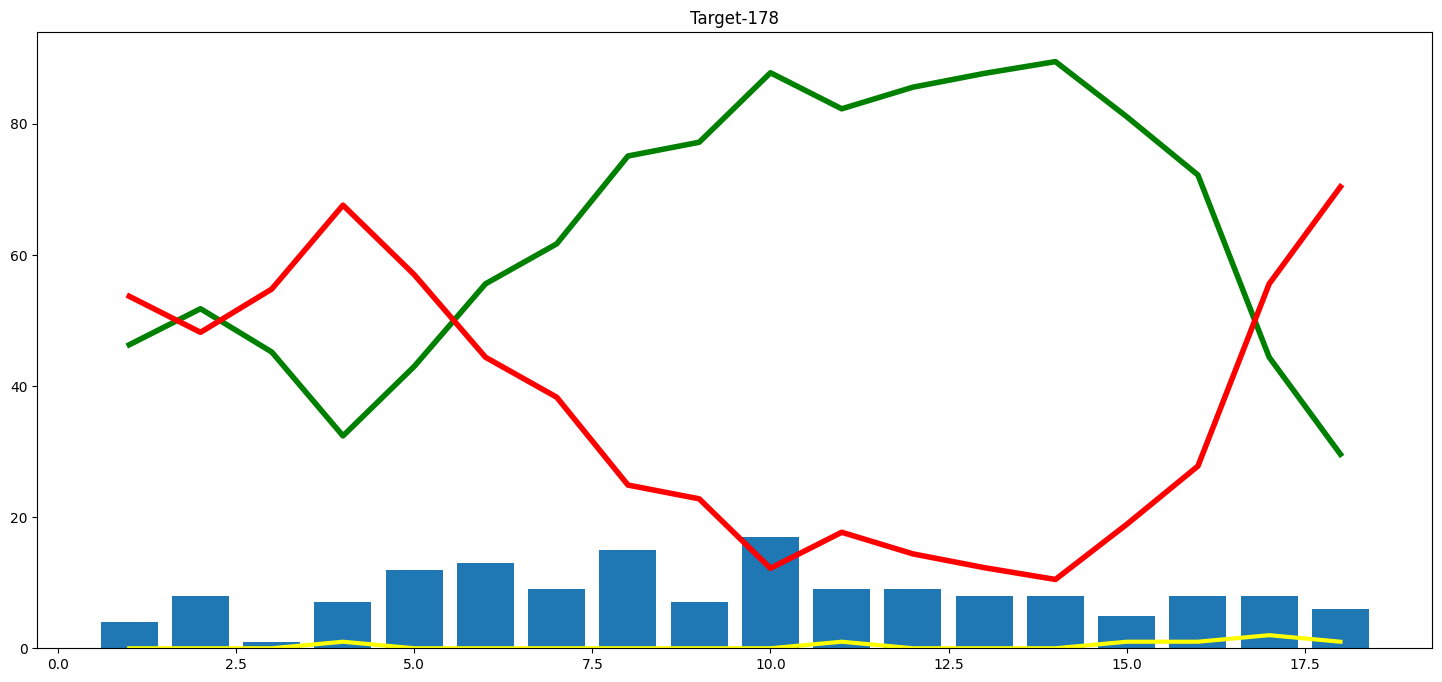

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color = 'yellow', linewidth = 3)
plt.plot(temp_df['end_of_over'], temp_df['win'], color = 'green', linewidth = 4)
plt.plot(temp_df['end_of_over'], temp_df['lose'], color = 'red', linewidth = 4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
teams

['Royal Challengers Bangalore',
 'Lucknow Super GiantsKolkata Knight Riders',
 'Kings XI Punjab',
 'Delhi Capitals',
 'Sunrisers Hyderabad',
 'Mumbai Indians',
 'Gujarat Titans',
 'Rajasthan Royals',
 'Chennai Super Kings']

In [ ]:
deliveries_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Bangalore', 'Indore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Sharjah', 'Abu Dhabi', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))